### Question 1: Setting up the notebook.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('student-por.csv', sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
len(data)

649

### Question 2

a) To create the new column titled ‘pass’ we need to write it with the apply function on the rows (recall axis=1 is rows, axis=0 is columns). The condition of your if statement should assign a value of 1 when the threshold is met, else it assigns a 0. 

In [5]:
def check_pass(G1,G2,G3):
    total = G1 + G2 + G3
    if total >= 35:
        return 1
    else:
        return 0

In [6]:
data['pass'] = data.apply(lambda x: check_pass(x['G1'],x['G2'],x['G3']), axis=1)

In [7]:
data['pass'].value_counts()

1    328
0    321
Name: pass, dtype: int64

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


b) Drop the Gi grade item using the drop function.

In [9]:
data = data.drop(['G1','G2','G3'], axis=1)

c) Display the top 5 rows of the new dataset. There should be 31 columns. 

In [10]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


### Question 3

a) Create a one-hot encoding using the get_dummies function for the following categorical variables: internet, romantic, higher, nursery, sex, school, activities, paid, famsup, schoolsup, guardian, reason, Fjob, Mjob, Pstatus, famsize, address. 

In [11]:
list = ['internet', 'romantic', 'higher', 'nursery', 'sex', 'school', 'activities', 'paid', 'famsup', 'schoolsup', 'guardian', 'reason', 'Fjob', 'Mjob', 'Pstatus', 'famsize', 'address']
data=pd.get_dummies(data, list)

b) Output the first 5 rows.

In [12]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_no,Fjob_yes,Mjob_no,Mjob_yes,Pstatus_no,Pstatus_yes,famsize_no,famsize_yes,address_no,address_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### Question 4

a) Shuffle the rows using the sample function with frac=1.

In [13]:
data = data.sample(frac=1)

In [14]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_no,Fjob_yes,Mjob_no,Mjob_yes,Pstatus_no,Pstatus_yes,famsize_no,famsize_yes,address_no,address_yes
288,18,2,1,1,2,0,4,3,4,1,...,1,0,1,0,0,1,0,1,0,1
388,18,3,3,1,2,0,5,3,4,1,...,0,1,0,1,0,1,0,1,1,0
379,17,2,2,4,1,0,4,4,5,5,...,1,0,0,1,0,1,0,1,1,0
261,17,2,1,3,2,0,2,1,1,1,...,0,1,0,1,0,1,1,0,1,0
616,18,1,1,2,1,0,3,3,2,1,...,1,0,1,0,0,1,0,1,0,1


b) Create your training set using the first 500 rows.

In [15]:
d_train = data[:500]
d_train.shape

(500, 57)

c) Create your testing set using the remaining 149 rows.

In [16]:
d_test = data[500:]
d_test.shape

(149, 57)

d) Now we only want attributes for training and testing, so we should drop “pass” and save it separately.

In [17]:
d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

e) Calculate and print out the number of passing students in the dataset. Print out the number passing out of 649 and also the percent passing. Print out some meaningful sentence with this information.

In [18]:
data['pass'].value_counts()

1    328
0    321
Name: pass, dtype: int64

In [19]:
def passing_rate(data):
    num_passing = data['pass'].value_counts()[1]
    percent_passing = num_passing/len(data)
    print("There are {} out of 649 students passing and the percent of passing is {:.2%}".format(num_passing, percent_passing))
passing_rate(data)

There are 328 out of 649 students passing and the percent of passing is 50.54%


### Question 5

a) Import tree from sklearn.

In [20]:
from sklearn import tree

b) Create a tree, setting criterion to entropy, and max_depth to 5, again, this is just a jumping off point, a better max_depth will be found based on accuracy. 

In [21]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

c) Fit your data. You will pass the object you created in part (b) your training sets and use ‘fit’. 

In [22]:
dt = dt.fit(d_train_att, d_train_pass)

### Question 6

a) Import graphviz

In [23]:
import graphviz

b) Using the code snip below as a guide create a visual representation of your tree. Use the same argument values. 

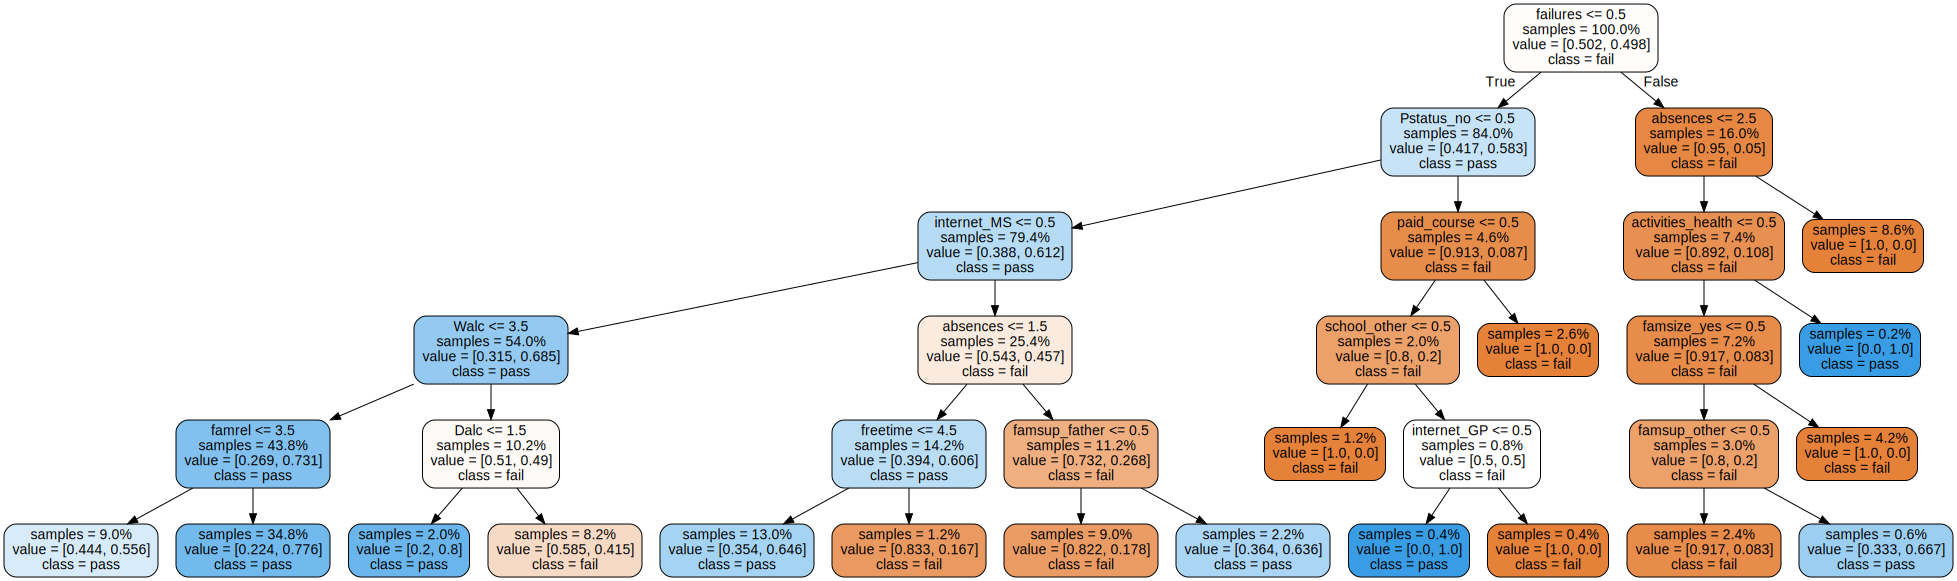

In [24]:
dot_data = tree.export_graphviz(dt, out_file=None, label="all", impurity=False, proportion=True,
                              feature_names=d_train_att.columns, class_names=["fail", "pass"], 
                              filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

c) Save your tree. Use the guide below.

In [25]:
tree.export_graphviz(dt, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                              feature_names=d_train_att.columns, class_names=["fail", "pass"], 
                              filled=True, rounded=True)

### Question 7

a) Score your tree. Your score should be around .597.

In [26]:
dt.score(d_test_att, d_test_pass)

0.7181208053691275

b) From sklearn.model_selection import cross_val_score.

In [27]:
d_att = data.drop(['pass'], axis=1)
d_pass = data['pass']

In [28]:
from sklearn.model_selection import cross_val_score

c) Cross validate. Use the following as a guide.

In [29]:
scores = cross_val_score(dt, d_att, d_pass, cv=5)

d) Print out your scores. mean(), +/- two standard deviations.

In [30]:
print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.04)


### Question 8

a) a) Write a loop that tests max_depth for values in a range between 1 and 20 (19 values).
The loop should cross validate and print out the max depth, Accuracy (scores. mean()), and a two standard deviation range (+/- scores.std()*2)) <br>
b) Print the values for each depth. What are the two best accuracy values and what depth do they correspond to?

In [31]:
for max_depth in range(1, 20):
    dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    scores = cross_val_score(dt, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.61 (+/- 0.04)
Max depth: 2, Accuracy: 0.69 (+/- 0.06)
Max depth: 3, Accuracy: 0.69 (+/- 0.08)
Max depth: 4, Accuracy: 0.67 (+/- 0.09)
Max depth: 5, Accuracy: 0.67 (+/- 0.04)
Max depth: 6, Accuracy: 0.66 (+/- 0.12)
Max depth: 7, Accuracy: 0.66 (+/- 0.09)
Max depth: 8, Accuracy: 0.64 (+/- 0.08)
Max depth: 9, Accuracy: 0.65 (+/- 0.08)
Max depth: 10, Accuracy: 0.64 (+/- 0.08)
Max depth: 11, Accuracy: 0.63 (+/- 0.11)
Max depth: 12, Accuracy: 0.63 (+/- 0.11)
Max depth: 13, Accuracy: 0.63 (+/- 0.14)
Max depth: 14, Accuracy: 0.63 (+/- 0.09)
Max depth: 15, Accuracy: 0.62 (+/- 0.10)
Max depth: 16, Accuracy: 0.63 (+/- 0.07)
Max depth: 17, Accuracy: 0.62 (+/- 0.08)
Max depth: 18, Accuracy: 0.65 (+/- 0.06)
Max depth: 19, Accuracy: 0.63 (+/- 0.09)


### Question 9

a) If you haven’t imported numpy yet, you will need to now. After doing so, create an empty 19X3 array to store the numerical data from the previous question.

In [32]:
import numpy as np
depth_acc = np.empty((19,3), float)

b) Fill your array. The ith row should have max_depth, scores.mean(), and scores.std*2. Correct output should look as follows.

In [33]:
i = 0
for max_depth in range(1, 20):
    dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    scores = cross_val_score(dt, d_att, d_pass, cv=5)
    depth_acc[i, 0] = max_depth
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std() * 2
    i += 1

depth_acc

array([[ 1.        ,  0.61017293,  0.03565453],
       [ 2.        ,  0.68723912,  0.06066208],
       [ 3.        ,  0.69036374,  0.07460741],
       [ 4.        ,  0.67650566,  0.09030139],
       [ 5.        ,  0.67952296,  0.03659125],
       [ 6.        ,  0.66720334,  0.11706113],
       [ 7.        ,  0.6686941 ,  0.08743355],
       [ 8.        ,  0.64403101,  0.0731514 ],
       [ 9.        ,  0.64101371,  0.09521559],
       [10.        ,  0.64103757,  0.07853374],
       [11.        ,  0.63792487,  0.11609056],
       [12.        ,  0.63483602,  0.08091292],
       [13.        ,  0.63488372,  0.11216398],
       [14.        ,  0.63490757,  0.11690036],
       [15.        ,  0.63946333,  0.08854953],
       [16.        ,  0.6194514 ,  0.11323681],
       [17.        ,  0.61631485,  0.09278693],
       [18.        ,  0.62100179,  0.08425577],
       [19.        ,  0.610161  ,  0.08188354]])

c) Import matplotlib and generate an error bar graph. Use the following as a guide.

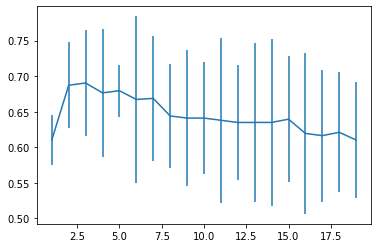

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

### Question 10

Generate a visual of the tree with the best depth.

In [35]:
dt_best = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
dt_best = dt_best.fit(d_train_att, d_train_pass)

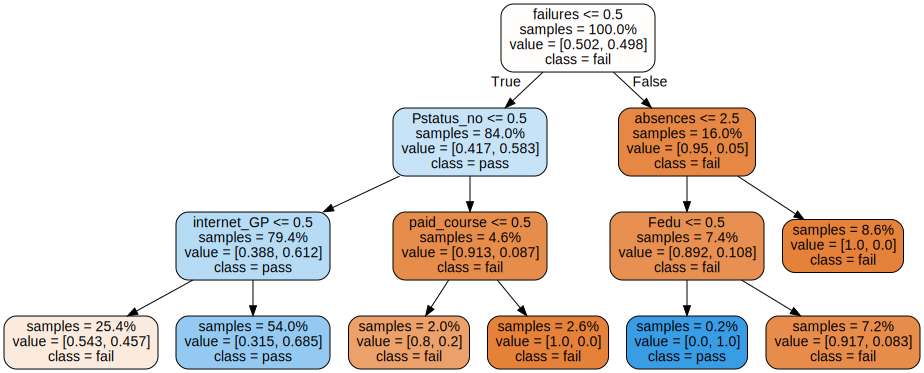

In [37]:
dot_data = tree.export_graphviz(dt_best, out_file=None, label="all", impurity=False, proportion=True,
                              feature_names=d_train_att.columns, class_names=["fail", "pass"], 
                              filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [38]:
dt_best.score(d_test_att, d_test_pass)

0.738255033557047

In [39]:
scores_best = cross_val_score(dt_best, d_att, d_pass, cv=5)

In [40]:
print("Accuracy: %0.2f (+/- %0.2f)"%(scores_best.mean(), scores_best.std() * 2))

Accuracy: 0.69 (+/- 0.08)
